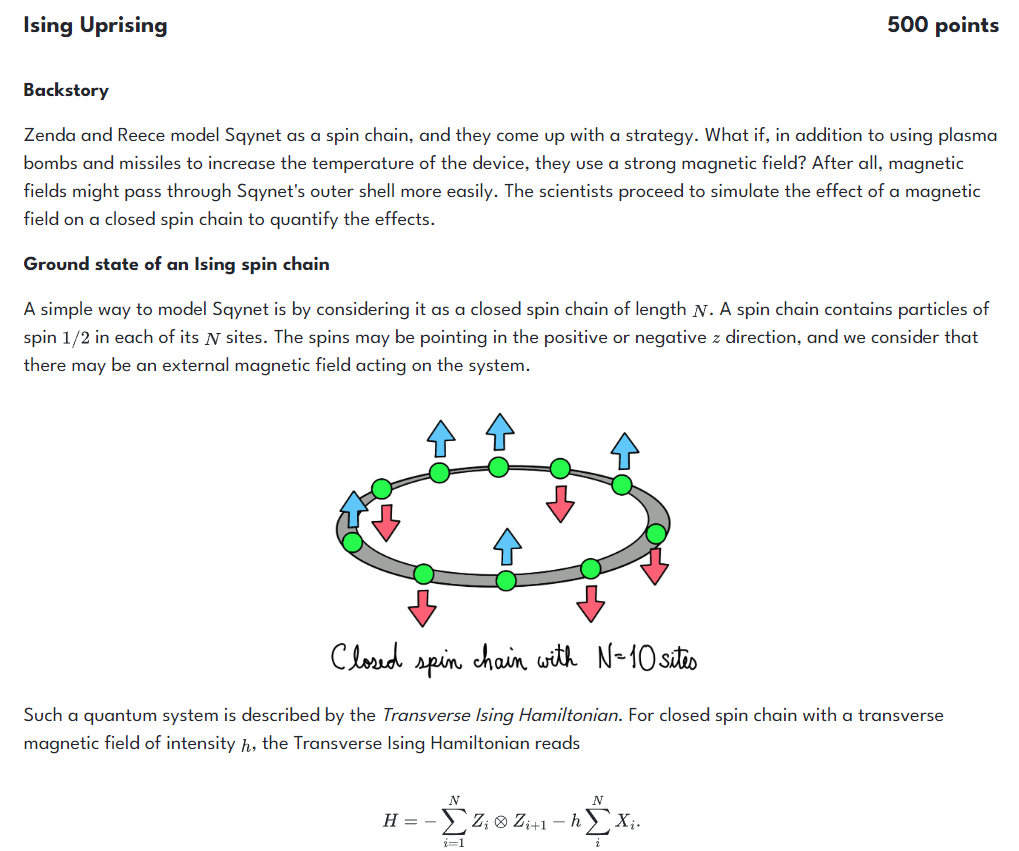

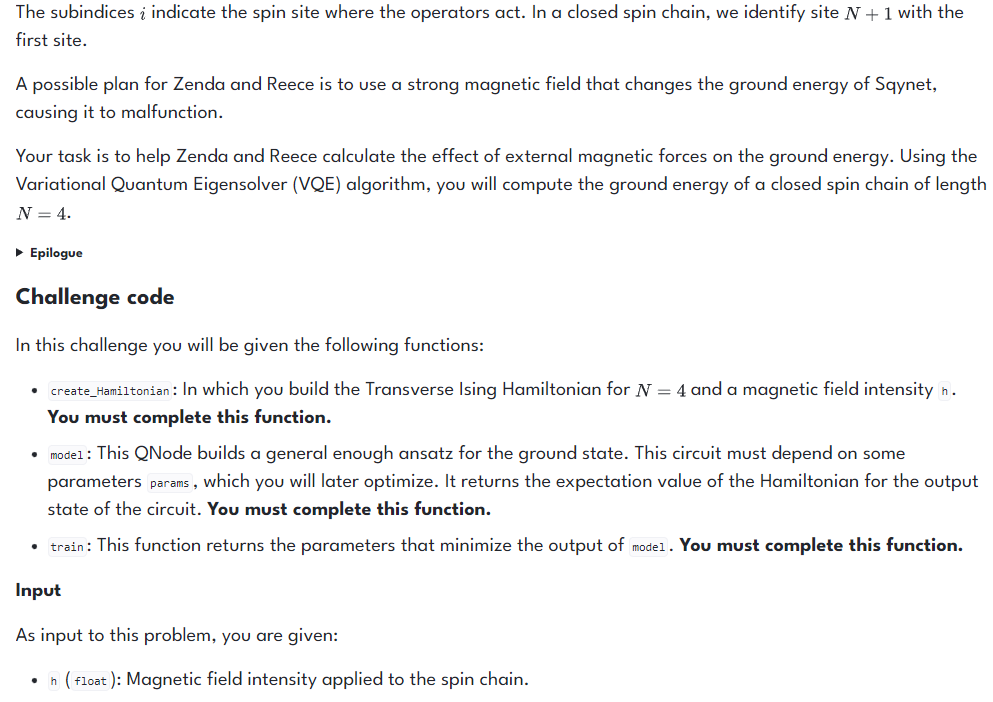

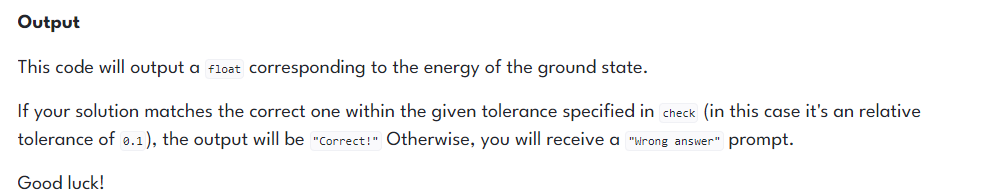

In [3]:
import json
import pennylane as qml
import pennylane.numpy as np

def create_Hamiltonian(h):
    """
    Function in charge of generating the Hamiltonian of the statement.

    Args:
        h (float): magnetic field strength

    Returns:
        (qml.Hamiltonian): Hamiltonian of the statement associated to h
    """

    ######################
    # Put your code here #
    ops = [qml.PauliX(3)]
    couplings = [-h]
    
    for i in range(3):
        couplings = [-h] + couplings
        ops = [qml.PauliX(i)] + ops        

    for i in range(4):
        couplings = [-1] + couplings
        ops = [qml.PauliZ(i)@qml.PauliZ((i+1)%4)] + ops

    return qml.Hamiltonian(couplings,ops)
    ######################

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def model(params, H):
    """
    To implement VQE you need an ansatz for the candidate ground state!
    Define here the VQE ansatz in terms of some parameters (params) that
    create the candidate ground state. These parameters will
    be optimized later.

    Args:
        params (numpy.array): parameters to be used in the variational circuit
        H (qml.Hamiltonian): Hamiltonian used to calculate the expected value

    Returns:
        (float): Expected value with respect to the Hamiltonian H
    """

    ######################
    qml.templates.QAOAEmbedding(features=[1.,2.,3.,4.], weights=params, wires=dev.wires)
    return qml.expval(H)
    ######################

def train(h):
    """
    In this function you must design a subroutine that returns the
    parameters that best approximate the ground state.

    Args:
        h (float): magnetic field strength

    Returns:
        (numpy.array): parameters that best approximate the ground state.
    """

    ######################
    # Put your code here #
    H = create_Hamiltonian(h)
    params = np.random.random(qml.templates.QAOAEmbedding.shape(n_layers=4, n_wires=4))
    print(f"init_params: {params}")
    energy = model(params, H)
    print(f"init_energy: {energy}")
    
    opt = qml.GradientDescentOptimizer()
    for i in range(1000):
        params = opt.step(lambda w : model(w, H), params) 
        #print(f"params_iteration: {params}")
        energy = model(params, H)
        print(f"energy_iteration: {energy}")
           
    print('Final value of the ground-state energy = {:.8f}'.format(energy))
    return params
    ######################


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    ins = json.loads(test_case_input)
    params = train(ins)
    return str(model(params, create_Hamiltonian(ins)))


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-1
    ), "The expected value is not correct."


test_cases = [['1.0', '-5.226251859505506'], ['2.3', '-9.66382463698038']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '1.0'...
init_params: [[0.01300963 0.97473885 0.28875854 0.07367436 0.1006854  0.75735154
  0.47594003 0.7208256 ]
 [0.40357636 0.60621867 0.80841702 0.24074496 0.43411713 0.77754868
  0.0124367  0.48746117]
 [0.20018656 0.877263   0.62110891 0.78062223 0.9641432  0.58235424
  0.00722281 0.75330534]
 [0.26789678 0.67878956 0.79105995 0.51558429 0.466975   0.40363486
  0.8781504  0.86990494]]
init_energy: -0.37345393088682916
energy_iteration: -0.49466569066340477
energy_iteration: -0.61717365334648
energy_iteration: -0.7408083692696436
energy_iteration: -0.8653925753374847
energy_iteration: -0.9907405994416784
energy_iteration: -1.1166577359791463
energy_iteration: -1.242939683018387
energy_iteration: -1.3693721371430894
energy_iteration: -1.4957306409655566
energy_iteration: -1.6217807705399112
energy_iteration: -1.7472787356449397
energy_iteration: -1.8719724458059748
energy_iteration: -1.9956030700508063
energy_iteration: -2.1179070901790773
energy_ite